In [1]:
!pip install openpyxl

In [2]:
!pip install emoji

In [3]:
!pip install wordcloud

In [4]:
!pip install pyspellchecker

In [5]:
import os
import pandas as pd
import emoji

In [6]:
# ejecutar luego de subir archivo excel o tener vinculado Google Drive

if os.path.isfile("mensajes_trabajo_final.xlsx"):
  df = pd.read_excel("mensajes_trabajo_final.xlsx")
elif os.path.isfile("/content/mensajes_trabajo_final.xlsx"):
  df = pd.read_excel("/content/mensajes_trabajo_final.xlsx")
else:
  from google.colab import drive

  # Montar Google Drive
  drive.mount('/content/drive')

  # Cambia el path al archivo que hayas subido a tu Google Drive
  file_path = '/content/drive/MyDrive/UCU-NLP/mensajes_trabajo_final.xlsx'

  # Cargar el archivo Excel
  df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataframe
print("Datos cargados:")
print(df.head())


df = pd.read_excel('mensajes_trabajo_final.xlsx')
df = df[df['recibido'] != '']
df.head()

Datos cargados:
   id_participante  id_mensaje  \
0               43         223   
1              265        1056   
2              425        1575   
3              429        1590   
4              921        3030   

                                             enviado       tipo subtipo  \
0   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
1   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
2   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
3   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
4   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   

                                            recibido  \
0                                               👍🏽🫶🏽   
1                                           Hola....   
2                                       👏🏻👏🏻 gracias   
3                                            Gracias   
4  Hola .. si suele..cuando me...desvelo..o de t

id_participante  id_mensaje  \
0               43         223   
1              265        1056   
2              425        1575   
3              429        1590   
4              921        3030   

                                             enviado       tipo subtipo  \
0   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
1   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
2   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
3   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
4   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   

                                            recibido  \
0                                               👍🏽🫶🏽   
1                                           Hola....   
2                                       👏🏻👏🏻 gracias   
3                                            Gracias   
4  Hola .. si suele..cuando me...desvelo..o de ta...   

                            clase  
0                  agradecimiento  
1                          saludo  
2                  agradecimiento  
3                  agradecimiento  
4  respuesta a consejo o pregunta

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import re

# si se agrega una lista de palabras a incluir solo se devuelven esas palabras si aparecen en el texto
# si se agrega una lista de palabras a excluir las mismas no se devolverán por más que estén en el texto
# si una misma palabra está en la lista de incluir y en la lista de excluir entonces será excluida
def contar_frecuencia_palabras(df, columna, palabras_incluir = None, palabras_excluir = None):
    texto_completo = " ".join(texto for texto in df[columna].astype('str'))
    palabras = re.findall(r'\b\w+\b', texto_completo)
    if palabras_incluir is not None:
        palabras = [palabra for palabra in palabras if word in palabras_incluir]
    if palabras_excluir is not None:
        palabras = [palabra for palabra in palabras if word not in palabras_excluir]
    frecuencia = Counter(palabras)
    palabras_ordenadas = frecuencia.most_common()
    return palabras_ordenadas


# grafica de palabras mostrando cantidad y frecuencia acumulada
# se muestran start_n elementos del principio y end_n elementos del final de los datos
def plot_word_frecuencies(data, start_n=5, end_n=5, ax1=None):

    if ax1 is None:
        ax1 = plt.gca()  # Obtiene el contexto actual de los ejes si no se proporciona uno


    # Extraer palabras y frecuencias
    words, frequencies = zip(*data)

    # Calcular frecuencias acumuladas
    cumulative_frequencies = np.cumsum(frequencies)

    total_frequency = cumulative_frequencies[-1]
    cumulative_percentages = cumulative_frequencies / total_frequency * 100  # Convertir a porcentajes

    # Seleccionar elementos según start_n y end_n
    selected_words = []
    selected_frequencies = []
    selected_cumulative_percentages = []

    if start_n > 0:
        selected_words.extend(words[:start_n])
        selected_frequencies.extend(frequencies[:start_n])
        selected_cumulative_percentages.extend(cumulative_percentages[:start_n])

    if end_n > 0:
        selected_words.extend(words[-end_n:])
        selected_frequencies.extend(frequencies[-end_n:])
        selected_cumulative_percentages.extend(cumulative_percentages[-end_n:])

    # Graficar frecuencias
    color = 'tab:blue'
    ax1.set_xlabel('Palabras')
    ax1.set_ylabel('Frecuencia', color=color)
    ax1.bar(selected_words, selected_frequencies, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(range(len(selected_words)))
    ax1.set_xticklabels([str(i) + ': ' + selected_words[i] for i in range(len(selected_words))], rotation=45, ha='right')

    # Crear un segundo eje para las frecuencias acumuladas en porcentaje
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Frecuencia acumulada (%)', color=color)
    ax2.plot(selected_words, selected_cumulative_percentages, color=color, marker='o', linestyle='dashed', linewidth=2, markersize=5)
    ax2.tick_params(axis='y', labelcolor=color)

    ax2.set_title('Frecuencias de palabras y acumulación en porcentaje')

    return ax1, ax2


def crear_nube(df, columna, collocations=False, stopwords=[], normalize_plurals=False, min_word_length=1, ancho=800, alto=400):

    texto_completo = " ".join(texto for texto in df[columna].astype('str'))
    
    palabras = re.findall(r'\b\w+\b', texto_completo)
    
    wordcloud = WordCloud(width = ancho, height = alto, background_color ='white', collocations=collocations, stopwords=stopwords, normalize_plurals=normalize_plurals, min_word_length=min_word_length).generate((" ").join(palabras))

    return wordcloud


def nube(df, columna, collocations=False, stopwords=[], normalize_plurals=False, min_word_length=1, ancho=800, alto=400):
    wordcloud = crear_nube(df, columna, collocations=collocations, stopwords=stopwords, normalize_plurals=normalize_plurals, min_word_length=min_word_length, ancho=ancho, alto=alto)
    # Visualizar la nube de palabras
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    # Mostrar la nube de palabras
    plt.show()


def mostrar_conteo(df, columna, palabras_inicio=25, palabras_fin=0):
    frecuencias = contar_frecuencia_palabras(df, columna)
    print("Frecuencias primeros 20:", frecuencias[:min(20,len(frecuencias))])
    print("Frecuencias últimos 20:", frecuencias[len(frecuencias)-min(20,len(frecuencias)):])
    
    print(f"Cantidad de palabras: {len(frecuencias)}")
    palabras_raras = [x[0] for x in frecuencias if x[1]<=3]
    print(f"Cantidad de palabras frecuencia <=3: {len(palabras_raras)}")
    palabras_unicas = [x[0] for x in frecuencias if x[1]==1]
    print(f"Cantidad de palabras frecuencia =1: {len(palabras_unicas)}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    ax1.imshow(crear_nube(df, columna))
    ax1.axis('off')
    
    ax2, ax2_2 = plot_word_frecuencies(frecuencias, palabras_inicio, palabras_fin, ax2)
    
    plt.tight_layout()
    plt.show()



    return frecuencias


Frecuencias primeros 20: [('quiero', 1762), ('recibirlos', 1654), ('SÍ', 1531), ('gracias', 1118), ('Gracias', 764), ('Si', 717), ('Hola', 680), ('me', 542), ('de', 524), ('Ok', 490), ('no', 476), ('la', 437), ('y', 420), ('por', 403), ('el', 396), ('si', 374), ('que', 361), ('a', 346), ('los', 283), ('No', 260)]
Frecuencias últimos 20: [('animarme', 1), ('mendoza', 1), ('esq', 1), ('ehh', 1), ('vuelto', 1), ('mientras', 1), ('alla', 1), ('tomsndo', 1), ('Les', 1), ('suspendieron', 1), ('hacerle', 1), ('Leido', 1), ('practica', 1), ('indica', 1), ('Marchetti', 1), ('autódromo', 1), ('constitución', 1), ('felicidades', 1), ('mentable', 1), ('haacerme', 1)]
Cantidad de palabras: 3538
Cantidad de palabras frecuencia <=3: 2785
Cantidad de palabras frecuencia =1: 2087


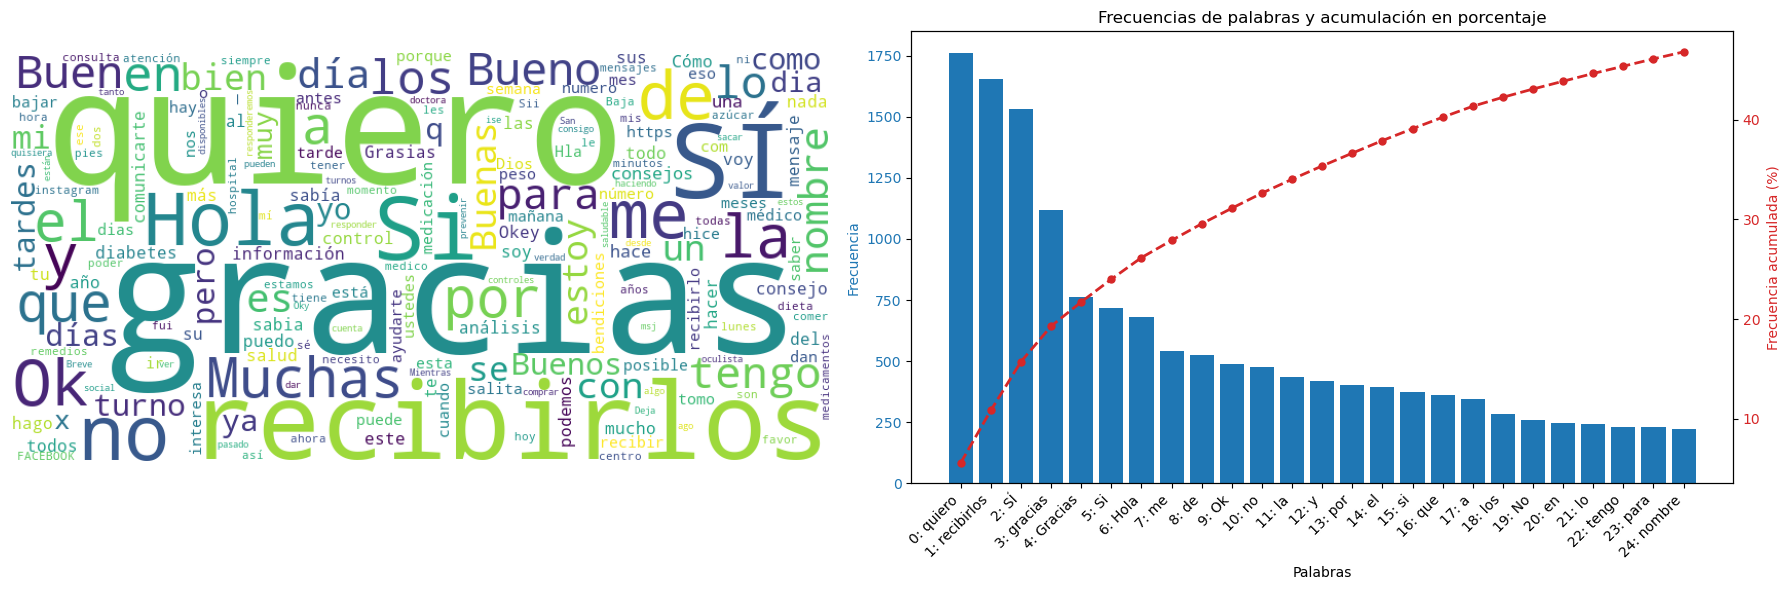

[('quiero', 1762),
 ('recibirlos', 1654),
 ('SÍ', 1531),
 ('gracias', 1118),
 ('Gracias', 764),
 ('Si', 717),
 ('Hola', 680),
 ('me', 542),
 ('de', 524),
 ('Ok', 490),
 ('no', 476),
 ('la', 437),
 ('y', 420),
 ('por', 403),
 ('el', 396),
 ('si', 374),
 ('que', 361),
 ('a', 346),
 ('los', 283),
 ('No', 260),
 ('en', 246),
 ('lo', 244),
 ('tengo', 230),
 ('para', 230),
 ('nombre', 221),
 ('Muchas', 219),
 ('día', 218),
 ('muchas', 199),
 ('Bueno', 191),
 ('es', 180),
 ('con', 174),
 ('un', 160),
 ('se', 139),
 ('Buen', 131),
 ('estoy', 131),
 ('mi', 130),
 ('buen', 128),
 ('bien', 122),
 ('q', 120),
 ('tardes', 120),
 ('días', 119),
 ('turno', 118),
 ('pero', 108),
 ('dia', 103),
 ('ya', 100),
 ('como', 93),
 ('x', 85),
 ('yo', 83),
 ('Buenas', 82),
 ('buenas', 78),
 ('consejos', 77),
 ('bueno', 76),
 ('información', 75),
 ('Buenos', 75),
 ('En', 74),
 ('una', 72),
 ('puedo', 71),
 ('muy', 71),
 ('diabetes', 68),
 ('NO', 66),
 ('al', 66),
 ('sabía', 65),
 ('este', 64),
 ('hola', 63),
 ('

In [8]:
mostrar_conteo(df,'recibido')

In [9]:
# Los mensajes de consentimiento se responden con botones que generan textos "Sí quiero recibirlos" o "No quiero recibirlos". Por ese motivo las palabras más frcuentes son "quiero", "recibirlos" y "Sí". Seguidas por variaciones de "gracias".

In [10]:
# Muchos mensajes contienen emojis y se decidió mantenerlos con su representación a texto.
# El paqute emoji permite hacer la conversión a texto del tipo :thumbs_up:
# Luego de probarla se comprobó que algunos de los nombres contienen guiones que en procesos posteriores separan palabras por lo que se modifica el diccionario para sutituirlos por guiones bajos.
# Algunos emoticones incluyen descripción del tono de piel por lo que se los agrupa sin el detalle del tono de piel.
# Los emoticones se sustituye por texto con delimitadores que se pierden al eliminar signos de puntuación por lo que se les agrega el prefijo em_

In [11]:
# ediciones del diccionario de emoji
# sustitución de guión del medio por guión bajo en nombres de emojis porque el guión del medio separa palabras
sin_traduccion = {}
emoji_es = {}
for i,em in list(emoji.EMOJI_DATA.items()):
    print('en',i,emoji.EMOJI_DATA[i]['en'],re.sub("-","_",emoji.EMOJI_DATA[i]['en']))
    print('es',i,emoji.EMOJI_DATA[i]['es'],re.sub("-","_",emoji.EMOJI_DATA[i]['es']))
    if emoji.EMOJI_DATA[i]['es'] == '' or emoji.EMOJI_DATA[i]['en'] == emoji.EMOJI_DATA[i]['es']:
        sin_traduccion[i] = {'en':emoji.EMOJI_DATA[i]['en'], 'es':emoji.EMOJI_DATA[i]['es']}
    emoji.EMOJI_DATA[i]['en'] = re.sub("-","_",emoji.EMOJI_DATA[i]['en'])
    emoji.EMOJI_DATA[i]['es'] = re.sub("-","_",emoji.EMOJI_DATA[i]['es'])
    emoji_es[emoji.EMOJI_DATA[i]['es']] = i

en 🥇 :1st_place_medal: :1st_place_medal:
es 🥇 :medalla_de_oro: :medalla_de_oro:
en 🥈 :2nd_place_medal: :2nd_place_medal:
es 🥈 :medalla_de_plata: :medalla_de_plata:
en 🥉 :3rd_place_medal: :3rd_place_medal:
es 🥉 :medalla_de_bronce: :medalla_de_bronce:
en 🆎 :AB_button_(blood_type): :AB_button_(blood_type):
es 🆎 :grupo_sanguíneo_ab: :grupo_sanguíneo_ab:
en 🏧 :ATM_sign: :ATM_sign:
es 🏧 :señal_de_cajero_automático: :señal_de_cajero_automático:
en 🅰️ :A_button_(blood_type): :A_button_(blood_type):
es 🅰️ :grupo_sanguíneo_a: :grupo_sanguíneo_a:
en 🅰 :A_button_(blood_type): :A_button_(blood_type):
es 🅰 :grupo_sanguíneo_a: :grupo_sanguíneo_a:
en 🇦🇫 :Afghanistan: :Afghanistan:
es 🇦🇫 :bandera_afganistán: :bandera_afganistán:
en 🇦🇱 :Albania: :Albania:
es 🇦🇱 :bandera_albania: :bandera_albania:
en 🇩🇿 :Algeria: :Algeria:
es 🇩🇿 :bandera_argelia: :bandera_argelia:
en 🇦🇸 :American_Samoa: :American_Samoa:
es 🇦🇸 :bandera_samoa_americana: :bandera_samoa_americana:
en 🇦🇩 :Andorra: :Andorra:
es 🇦🇩 :bandera_and

In [12]:
# se revisan casos sin traducción al español o donde el texto es igual al de inglés
# luego de revisarlos se determina que la traducción es adecuada
sin_traduccion

{'🥯': {'en': ':bagel:', 'es': ':bagel:'},
 '🪕': {'en': ':banjo:', 'es': ':banjo:'},
 '👙': {'en': ':bikini:', 'es': ':bikini:'},
 '🌯': {'en': ':burrito:', 'es': ':burrito:'},
 '🌵': {'en': ':cactus:', 'es': ':cactus:'},
 '🏕️': {'en': ':camping:', 'es': ':camping:'},
 '🏕': {'en': ':camping:', 'es': ':camping:'},
 '©️': {'en': ':copyright:', 'es': ':copyright:'},
 '©': {'en': ':copyright:', 'es': ':copyright:'},
 '\U0001fab8': {'en': ':coral:', 'es': ':coral:'},
 '🍡': {'en': ':dango:', 'es': ':dango:'},
 '🕵️': {'en': ':detective:', 'es': ':detective:'},
 '🕵': {'en': ':detective:', 'es': ':detective:'},
 '🦤': {'en': ':dodo:', 'es': ':dodo:'},
 '🥟': {'en': ':dumpling:', 'es': ':dumpling:'},
 '🧆': {'en': ':falafel:', 'es': ':falafel:'},
 '🫕': {'en': ':fondue:', 'es': ':fondue:'},
 '\U0001faac': {'en': ':hamsa:', 'es': ':hamsa:'},
 '🏥': {'en': ':hospital:', 'es': ':hospital:'},
 '🏨': {'en': ':hotel:', 'es': ':hotel:'},
 '🕹️': {'en': ':joystick:', 'es': ':joystick:'},
 '🕹': {'en': ':joystick:',

In [13]:
def convertir_emoticones(texto,language='es'):
    if isinstance(texto, str):
        texto_emoji = emoji.demojize(texto, delimiters=(":", ":"),language=language)
        return texto_emoji
    else:
        return texto

# se cambian los delimitadores por el prefijo em_ porque los delimitadores se pierden enoperaciones posteriores
def emoji_em(line):
    return re.sub(r':([^:^\s]+):', ' em_\\1 ', line)

df['recibido_con_emoticones'] = df['recibido'].apply(convertir_emoticones).astype('str').astype('str').apply(emoji_em)

cp_con_emoticones = contar_frecuencia_palabras(df, "recibido_con_emoticones")

print("Emoticones encontrados:")
{wf[0]:wf[1] for wf in cp_con_emoticones if "em_" in wf[0]}

Emoticones encontrados:


{'em_pulgar_hacia_arriba': 450,
 'em_pulgar_hacia_arriba_tono_de_piel_claro': 79,
 'em_manos_aplaudiendo': 69,
 'em_chispas': 68,
 'em_cara_lanzando_un_beso': 56,
 'em_cara_feliz_con_ojos_sonrientes': 55,
 'em_marca_de_beso': 50,
 'em_cara_cabreada': 42,
 'em_pulgar_hacia_arriba_tono_de_piel_claro_medio': 29,
 'em_bíceps_flexionado': 23,
 'em_corazón_rojo': 20,
 'em_cara_sonriendo_con_corazones': 20,
 'em_personas_abrazándose': 19,
 'em_manos_en_oración': 17,
 'em_cara_sonriente': 14,
 'em_rosa': 14,
 'em_dorso_de_mano_con_índice_a_la_derecha_tono_de_piel_claro_medio': 14,
 'em_manos_aplaudiendo_tono_de_piel_claro': 12,
 'em_cara_guiñando_el_ojo': 12,
 'em_pulgar_hacia_arriba_tono_de_piel_medio': 11,
 'em_cara_sonriendo_ligeramente': 11,
 'em_cara_con_manos_abrazando': 11,
 'em_hombre_sordo': 10,
 'em_manos_formando_un_corazón_tono_de_piel_claro': 10,
 'em_persona_con_la_mano_levantada': 9,
 'em_dorso_de_mano_con_índice_a_la_derecha': 9,
 'em_manos_en_oración_tono_de_piel_claro': 9,
 '

In [14]:
emoji_buscar = 'em_una_y_media'

print("emoji:",emoji_es[re.sub('em_',':',emoji_buscar) + ':'])
print("mensajes que lo contienen:")
df[["id_participante","enviado","recibido","clase"]][df["recibido_con_emoticones"].str.contains(emoji_buscar)]

emoji: 🕜
mensajes que lo contienen:


id_participante                                            enviado  \
6006              751  Necesitamos tu aprobación para enviarte mensaj...   
6007              751  Necesitamos tu aprobación para enviarte mensaj...   

                                               recibido          clase  
6006  🕜 LOS HORARIOS:  Lu a Vie 10 a 17hs.Sab 10 a 1...  autorespuesta  
6007  🦕 veterinaria chipet 🦑\n"DEJAME TU CONSULTA, \...  autorespuesta

In [15]:
# emojis con detalle de tono de piel
[wf for wf in cp_con_emoticones if '_tono_de_piel' in wf[0]]

[('em_pulgar_hacia_arriba_tono_de_piel_claro', 79),
 ('em_pulgar_hacia_arriba_tono_de_piel_claro_medio', 29),
 ('em_dorso_de_mano_con_índice_a_la_derecha_tono_de_piel_claro_medio', 14),
 ('em_manos_aplaudiendo_tono_de_piel_claro', 12),
 ('em_pulgar_hacia_arriba_tono_de_piel_medio', 11),
 ('em_manos_formando_un_corazón_tono_de_piel_claro', 10),
 ('em_manos_en_oración_tono_de_piel_claro', 9),
 ('em_pulgar_hacia_arriba_tono_de_piel_oscuro_medio', 8),
 ('em_bíceps_flexionado_tono_de_piel_medio', 4),
 ('em_pulgar_hacia_arriba_tono_de_piel_oscuro', 4),
 ('em_señal_de_aprobación_con_la_mano_tono_de_piel_claro', 3),
 ('em_manos_formando_un_corazón_tono_de_piel_medio', 2),
 ('em_puño_hacia_la_derecha_tono_de_piel_claro', 1),
 ('em_manos_aplaudiendo_tono_de_piel_medio', 1),
 ('em_hombre_haciendo_una_reverencia_tono_de_piel_claro_medio', 1),
 ('em_manos_en_oración_tono_de_piel_claro_medio', 1),
 ('em_mujer_con_la_mano_levantada_tono_de_piel_claro', 1),
 ('em_mujer_corriendo_tono_de_piel_claro', 1

In [16]:
def aplicar_correcciones(line, correcciones, prefijo="", sufijo=""):
    for correccion in correcciones:
        line = re.sub(prefijo + correccion + sufijo, correcciones[correccion], line)
    return(line)

In [17]:
# se agrupan emojis de distintos tonos de piel
agrupamiento_emojis = {}
#agrupamiento_emojis['em_([^\b]+)_(light|medium_light|medium|medium_dark|dark)_skin_tone'] = ' em_\\1 '
agrupamiento_emojis['_medium_light_skin_tone\\b'] = ' '
agrupamiento_emojis['_medium_dark_skin_tone\\b'] = ' '
agrupamiento_emojis['_light_skin_tone\\b'] = ' '
agrupamiento_emojis['_medium_skin_tone\\b'] = ' '
agrupamiento_emojis['_dark_skin_tone\\b'] = ' '

agrupamiento_emojis['_tono_de_piel_claro_medio\\b'] = ' '
agrupamiento_emojis['_tono_de_piel_oscuro_medio\\b'] = ' '
agrupamiento_emojis['_tono_de_piel_claro\\b'] = ' '
agrupamiento_emojis['_tono_de_piel_medio\\b'] = ' '
agrupamiento_emojis['_tono_de_piel_oscuro\\b'] = ' '

df['recibido_con_emoticones'] = df['recibido_con_emoticones'].apply(aplicar_correcciones, correcciones = agrupamiento_emojis)

cp_con_emoticones = contar_frecuencia_palabras(df, "recibido_con_emoticones")

print("Emoticones encontrados:")
print([wf for wf in cp_con_emoticones if "em_" in wf[0]])

cp_con_emoticones

Emoticones encontrados:
[('em_pulgar_hacia_arriba', 581), ('em_manos_aplaudiendo', 83), ('em_chispas', 68), ('em_cara_lanzando_un_beso', 56), ('em_cara_feliz_con_ojos_sonrientes', 55), ('em_marca_de_beso', 50), ('em_cara_cabreada', 42), ('em_bíceps_flexionado', 28), ('em_manos_en_oración', 27), ('em_dorso_de_mano_con_índice_a_la_derecha', 23), ('em_manos_formando_un_corazón', 20), ('em_corazón_rojo', 20), ('em_cara_sonriendo_con_corazones', 20), ('em_personas_abrazándose', 19), ('em_cara_sonriente', 14), ('em_rosa', 14), ('em_cara_guiñando_el_ojo', 12), ('em_cara_sonriendo_ligeramente', 11), ('em_cara_con_manos_abrazando', 11), ('em_hombre_sordo', 10), ('em_persona_con_la_mano_levantada', 9), ('em_señal_de_aprobación_con_la_mano', 9), ('em_colisión', 8), ('em_flecha_hacia_la_derecha', 8), ('em_mujer_con_la_mano_levantada', 7), ('em_dorso_de_mano_con_índice_hacia_arriba', 7), ('em_cara_gritando_de_miedo', 6), ('em_botón_de_marca_de_verificación', 6), ('em_cara_pensativa', 6), ('em_cara_

[('quiero', 1762),
 ('recibirlos', 1654),
 ('SÍ', 1531),
 ('gracias', 1118),
 ('Gracias', 764),
 ('Si', 717),
 ('Hola', 680),
 ('em_pulgar_hacia_arriba', 581),
 ('me', 542),
 ('de', 524),
 ('Ok', 490),
 ('no', 476),
 ('la', 437),
 ('y', 420),
 ('por', 403),
 ('el', 396),
 ('si', 374),
 ('que', 361),
 ('a', 346),
 ('los', 283),
 ('No', 260),
 ('en', 246),
 ('lo', 244),
 ('tengo', 230),
 ('para', 230),
 ('nombre', 221),
 ('Muchas', 219),
 ('día', 218),
 ('muchas', 199),
 ('Bueno', 191),
 ('es', 180),
 ('con', 174),
 ('un', 160),
 ('se', 139),
 ('Buen', 131),
 ('estoy', 131),
 ('mi', 130),
 ('buen', 128),
 ('bien', 122),
 ('q', 120),
 ('tardes', 120),
 ('días', 119),
 ('turno', 118),
 ('pero', 108),
 ('dia', 103),
 ('ya', 100),
 ('como', 93),
 ('x', 85),
 ('em_manos_aplaudiendo', 83),
 ('yo', 83),
 ('Buenas', 82),
 ('buenas', 78),
 ('consejos', 77),
 ('bueno', 76),
 ('información', 75),
 ('Buenos', 75),
 ('En', 74),
 ('una', 72),
 ('puedo', 71),
 ('muy', 71),
 ('diabetes', 68),
 ('em_chis

In [18]:
# emojis con detalle de tono de piel
[wf for wf in cp_con_emoticones if '_tono_de_piel' in wf[0]]

[]

In [19]:
# emoticones encontrados
[wf for wf in cp_con_emoticones if 'em_' in wf[0]]

[('em_pulgar_hacia_arriba', 581),
 ('em_manos_aplaudiendo', 83),
 ('em_chispas', 68),
 ('em_cara_lanzando_un_beso', 56),
 ('em_cara_feliz_con_ojos_sonrientes', 55),
 ('em_marca_de_beso', 50),
 ('em_cara_cabreada', 42),
 ('em_bíceps_flexionado', 28),
 ('em_manos_en_oración', 27),
 ('em_dorso_de_mano_con_índice_a_la_derecha', 23),
 ('em_manos_formando_un_corazón', 20),
 ('em_corazón_rojo', 20),
 ('em_cara_sonriendo_con_corazones', 20),
 ('em_personas_abrazándose', 19),
 ('em_cara_sonriente', 14),
 ('em_rosa', 14),
 ('em_cara_guiñando_el_ojo', 12),
 ('em_cara_sonriendo_ligeramente', 11),
 ('em_cara_con_manos_abrazando', 11),
 ('em_hombre_sordo', 10),
 ('em_persona_con_la_mano_levantada', 9),
 ('em_señal_de_aprobación_con_la_mano', 9),
 ('em_colisión', 8),
 ('em_flecha_hacia_la_derecha', 8),
 ('em_mujer_con_la_mano_levantada', 7),
 ('em_dorso_de_mano_con_índice_hacia_arriba', 7),
 ('em_cara_gritando_de_miedo', 6),
 ('em_botón_de_marca_de_verificación', 6),
 ('em_cara_pensativa', 6),
 ('em_

Frecuencias primeros 20: [('quiero', 1762), ('recibirlos', 1654), ('SÍ', 1531), ('gracias', 1118), ('Gracias', 764), ('Si', 717), ('Hola', 680), ('em_pulgar_hacia_arriba', 581), ('me', 542), ('de', 524), ('Ok', 490), ('no', 476), ('la', 437), ('y', 420), ('por', 403), ('el', 396), ('si', 374), ('que', 361), ('a', 346), ('los', 283)]
Frecuencias últimos 20: [('animarme', 1), ('mendoza', 1), ('esq', 1), ('ehh', 1), ('vuelto', 1), ('mientras', 1), ('alla', 1), ('tomsndo', 1), ('Les', 1), ('suspendieron', 1), ('hacerle', 1), ('Leido', 1), ('practica', 1), ('indica', 1), ('Marchetti', 1), ('autódromo', 1), ('constitución', 1), ('felicidades', 1), ('mentable', 1), ('haacerme', 1)]
Cantidad de palabras: 3680
Cantidad de palabras frecuencia <=3: 2884
Cantidad de palabras frecuencia =1: 2150


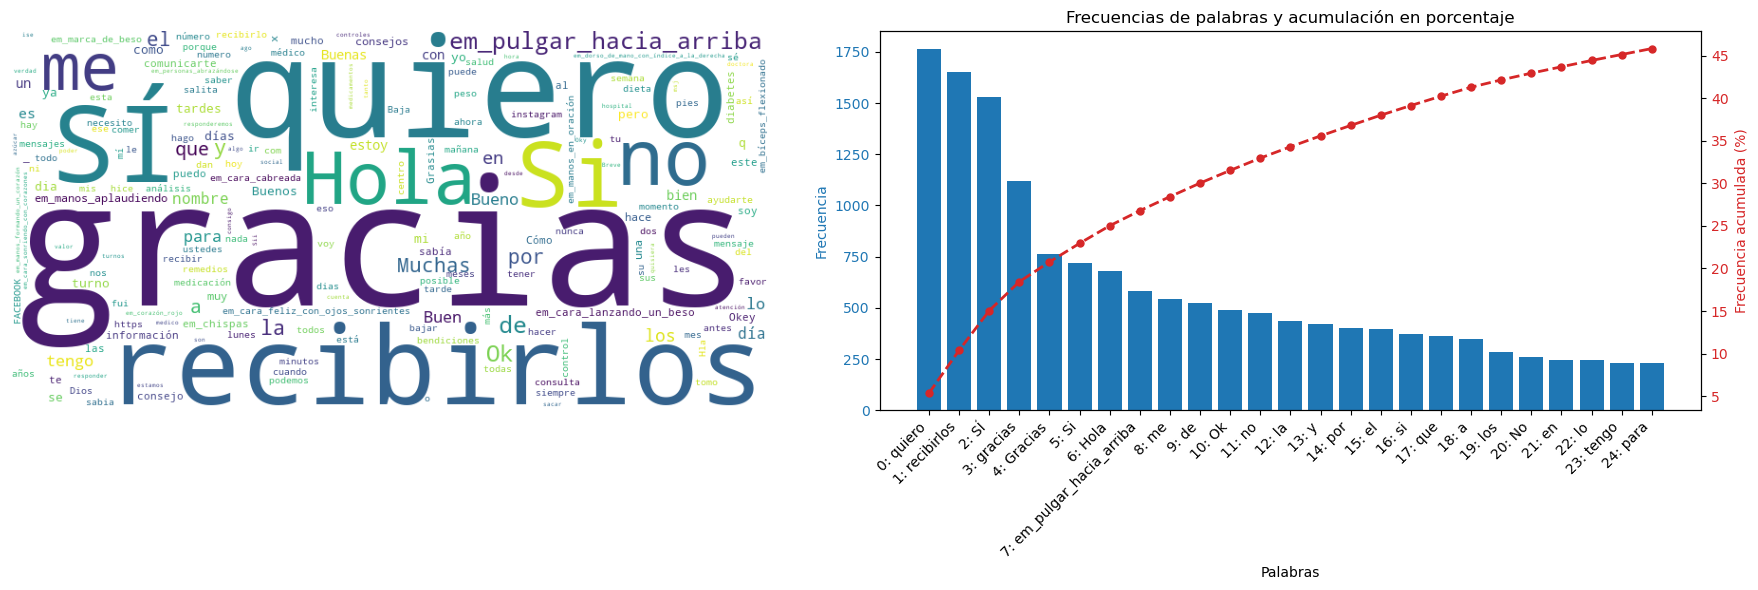

[('quiero', 1762),
 ('recibirlos', 1654),
 ('SÍ', 1531),
 ('gracias', 1118),
 ('Gracias', 764),
 ('Si', 717),
 ('Hola', 680),
 ('em_pulgar_hacia_arriba', 581),
 ('me', 542),
 ('de', 524),
 ('Ok', 490),
 ('no', 476),
 ('la', 437),
 ('y', 420),
 ('por', 403),
 ('el', 396),
 ('si', 374),
 ('que', 361),
 ('a', 346),
 ('los', 283),
 ('No', 260),
 ('en', 246),
 ('lo', 244),
 ('tengo', 230),
 ('para', 230),
 ('nombre', 221),
 ('Muchas', 219),
 ('día', 218),
 ('muchas', 199),
 ('Bueno', 191),
 ('es', 180),
 ('con', 174),
 ('un', 160),
 ('se', 139),
 ('Buen', 131),
 ('estoy', 131),
 ('mi', 130),
 ('buen', 128),
 ('bien', 122),
 ('q', 120),
 ('tardes', 120),
 ('días', 119),
 ('turno', 118),
 ('pero', 108),
 ('dia', 103),
 ('ya', 100),
 ('como', 93),
 ('x', 85),
 ('em_manos_aplaudiendo', 83),
 ('yo', 83),
 ('Buenas', 82),
 ('buenas', 78),
 ('consejos', 77),
 ('bueno', 76),
 ('información', 75),
 ('Buenos', 75),
 ('En', 74),
 ('una', 72),
 ('puedo', 71),
 ('muy', 71),
 ('diabetes', 68),
 ('em_chis

In [20]:
mostrar_conteo(df,'recibido_con_emoticones')

Frecuencias primeros 20: [('gracias', 1923), ('quiero', 1783), ('recibirlos', 1656), ('sí', 1565), ('si', 1117), ('no', 802), ('hola', 757), ('me', 602), ('em_pulgar_hacia_arriba', 581), ('de', 580), ('ok', 541), ('y', 466), ('la', 460), ('muchas', 435), ('el', 427), ('por', 425), ('que', 392), ('a', 375), ('en', 328), ('los', 296)]
Frecuencias últimos 20: [('etc', 1), ('parece', 1), ('nda', 1), ('animarme', 1), ('mendoza', 1), ('esq', 1), ('ehh', 1), ('vuelto', 1), ('alla', 1), ('tomsndo', 1), ('suspendieron', 1), ('hacerle', 1), ('practica', 1), ('indica', 1), ('marchetti', 1), ('autódromo', 1), ('constitución', 1), ('felicidades', 1), ('mentable', 1), ('haacerme', 1)]
Cantidad de palabras: 3115
Cantidad de palabras frecuencia <=3: 2379
Cantidad de palabras frecuencia =1: 1730


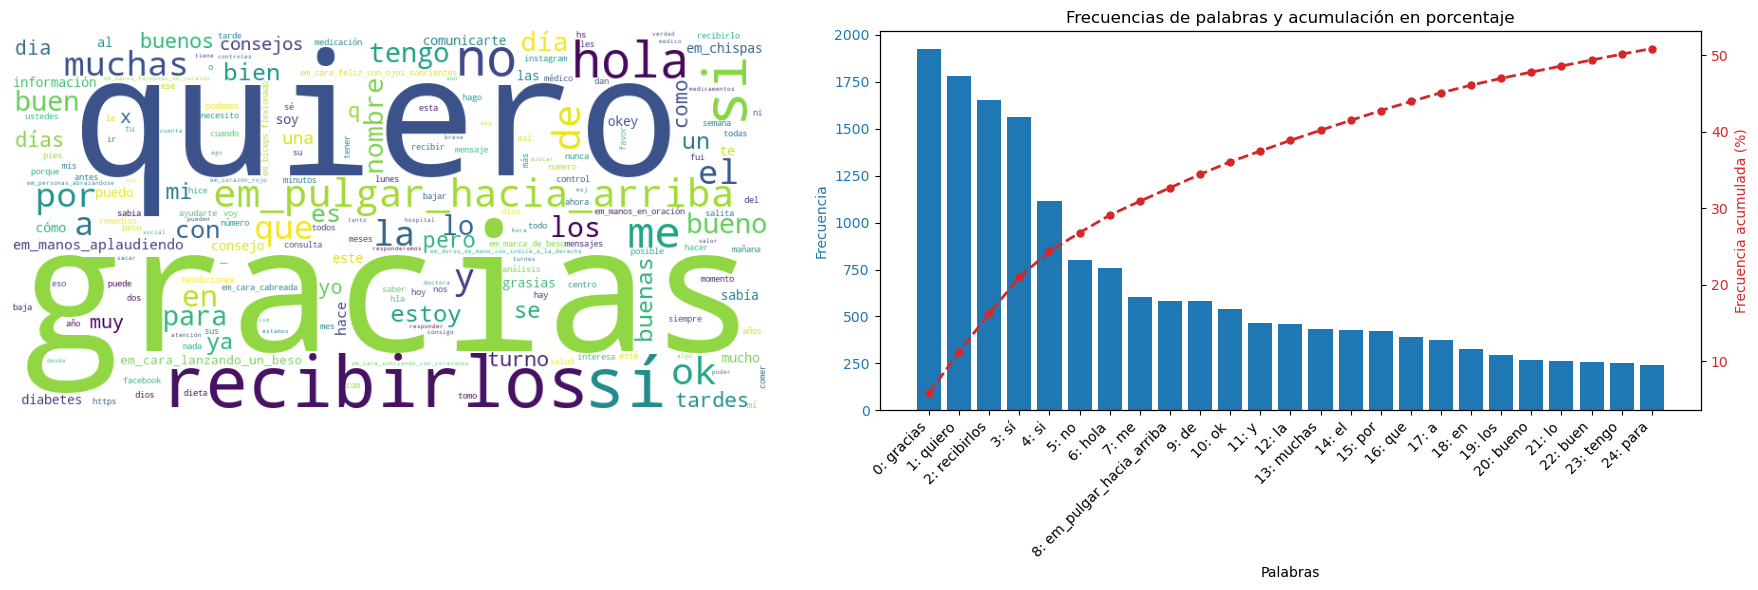

[('gracias', 1923),
 ('quiero', 1783),
 ('recibirlos', 1656),
 ('sí', 1565),
 ('si', 1117),
 ('no', 802),
 ('hola', 757),
 ('me', 602),
 ('em_pulgar_hacia_arriba', 581),
 ('de', 580),
 ('ok', 541),
 ('y', 466),
 ('la', 460),
 ('muchas', 435),
 ('el', 427),
 ('por', 425),
 ('que', 392),
 ('a', 375),
 ('en', 328),
 ('los', 296),
 ('bueno', 269),
 ('lo', 263),
 ('buen', 259),
 ('tengo', 251),
 ('para', 243),
 ('nombre', 221),
 ('día', 218),
 ('es', 201),
 ('con', 183),
 ('estoy', 171),
 ('bien', 170),
 ('un', 166),
 ('buenas', 162),
 ('se', 147),
 ('mi', 142),
 ('ya', 141),
 ('pero', 132),
 ('q', 124),
 ('tardes', 122),
 ('días', 120),
 ('turno', 120),
 ('buenos', 118),
 ('yo', 111),
 ('como', 111),
 ('dia', 106),
 ('x', 93),
 ('muy', 91),
 ('consejos', 84),
 ('una', 84),
 ('em_manos_aplaudiendo', 83),
 ('hace', 83),
 ('información', 76),
 ('puedo', 74),
 ('este', 73),
 ('diabetes', 71),
 ('al', 69),
 ('em_chispas', 68),
 ('sabía', 67),
 ('grasias', 64),
 ('las', 63),
 ('consejo', 62),
 (

In [21]:
#### LIMPIEZA ####
def separa_letra_numero(line):
    return re.sub('([\d]+)([a-zA-Z]+)','\\1 \\2',re.sub('([a-zA-Z]+)([\d]+)','\\1 \\2',line))
def puntuacion(line):
    return re.sub('([^\w\s@#]+)', ' ', line)
def blank_line(line):
    return re.sub(r'[("\n\r")\n]',' ', line)
def minuscula(line):
    return line.lower()
def letras_repetidas(line):
    return re.sub("(.)\\1{2,}", "\\1", line)
def espacios_dobles(line):
    return re.sub('\s\s+', ' ', line)

df['recibido_limpio'] = df['recibido_con_emoticones'].apply(separa_letra_numero).apply(puntuacion).apply(blank_line).apply(minuscula).apply(letras_repetidas).apply(espacios_dobles)

mostrar_conteo(df,'recibido_limpio')

cp_limpio = contar_frecuencia_palabras(df, "recibido_limpio")
cp_limpio

In [22]:
# diccionario para darle significado a los emoticones
significados_emoticones = {
'em_aceituna': 'aceituna',
'em_advertencia': 'advertencia',
'em_arcoíris': 'divesidad',
'em_batería_baja': 'cansancio',
'em_botella_descorchada': 'brindar',
'em_botón_de_marca_de_verificación': 'verificado',
'em_botón_ok': 'ok',
'em_brócoli': 'brócoli',
'em_bíceps_flexionado': 'fuerza',
'em_calamar': 'calamar',
'em_caniche': 'caniche',
'em_cara_aguantándose_las_lágrimas': 'felicidad',
'em_cara_asombrada': 'asombro',
'em_cara_asustada': 'miedo',
'em_cara_babeando': 'tentación',
'em_cara_cabreada': 'enojo',
'em_cara_cansada': 'cansancio',
'em_cara_con_calor': 'acalorado',
'em_cara_con_frío': 'helado',
'em_cara_con_manos_abrazando': 'afecto',
'em_cara_con_mascarilla_médica': 'enfermedad',
'em_cara_con_ojos_en_blanco': 'frustración',
'em_cara_con_termómetro': 'enfermedad',
'em_cara_de_confusión': 'confusión',
'em_cara_de_empollón': 'felicidad',
'em_cara_de_fiesta': 'felicidad',
'em_cara_de_sueño': 'sueño',
'em_cara_de_vaca': 'cara_de_vaca',
'em_cara_decepcionada': 'decepción',
'em_cara_derritiéndose': 'vergüenza',
'em_cara_desanimada': 'desánimo',
'em_cara_estornudando': 'enfermedad',
'em_cara_feliz_con_ojos_sonrientes': 'felicidad',
'em_cara_gritando_de_miedo': 'miedo',
'em_cara_guiñando_el_ojo': 'complicidad',
'em_cara_lanzando_un_beso': 'beso',
'em_cara_llorando_de_risa': 'alegría',
'em_cara_llorando_fuerte': 'tristeza',
'em_cara_pensativa': 'pensar',
'em_cara_radiante_con_ojos_sonrientes': 'felicidad',
'em_cara_resoplando': 'enojo',
'em_cara_revolviéndose_de_la_risa': 'felicidad',
'em_cara_saludando': 'saludo',
'em_cara_sonriendo_con_corazones': 'afecto',
'em_cara_sonriendo_con_estrellas': 'felicidad',
'em_cara_sonriendo_con_gafas_de_sol': 'felicidad',
'em_cara_sonriendo_con_ojos_de_corazón': 'felicidad',
'em_cara_sonriendo_con_ojos_grandes': 'felicidad',
'em_cara_sonriendo_con_ojos_sonrientes': 'felicidad',
'em_cara_sonriendo_con_sudor_frío': 'felicidad',
'em_cara_sonriendo_ligeramente': 'felicidad',
'em_cara_sonriente': 'felicidad',
'em_cara_sonriente_con_lágrima': 'felicidad',
'em_cara_sonrojada': 'vergüenza',
'em_cara_tapada_con_ojo_espiando': 'vergüenza',
'em_casa_con_jardín': 'casa',
'em_chincheta': 'chinche',
'em_chispas': 'chispas',
'em_coche': 'auto',
'em_colisión': 'colisión',
'em_copas_brindando': 'festejo',
'em_corazones_giratorios': 'afecto',
'em_corazón_azul_claro': 'afecto',
'em_corazón_con_flecha': 'afecto',
'em_corazón_latiendo': 'afecto',
'em_corazón_morado': 'afecto',
'em_corazón_rojo': 'afecto',
'em_corazón_rosa': 'afecto',
'em_corazón_vendado': 'recuperación',
'em_cuaderno_de_notas': 'anotar',
'em_dorso_de_mano_con_índice_a_la_derecha': 'señalar',
'em_dos_corazones': 'afecto',
'em_dónut': 'dona',
'em_espiga_de_maíz': 'maíz',
'em_estetoscopio': 'estetoscopio',
'em_exclamación_de_corazón': 'afecto',
'em_exclamación_doble': 'importante',
'em_flecha_hacia_la_derecha': 'señalar',
'em_flor_de_cerezo': 'flor',
'em_fresa': 'fresa',
'em_fuego': 'fuego',
'em_girasol': 'girasol',
'em_globo_terráqueo_mostrando_américa': 'mundo',
'em_gota': 'gota',
'em_gotas_de_sudor': 'gotas',
'em_hierba': 'hierba',
'em_hoja_de_arce': 'hoja',
'em_hombre_haciendo_una_reverencia': 'respeto',
'em_hombre_sordo': 'sordera',
'em_huellas_de_pies': 'seguir',
'em_jeringuilla': 'jeringa',
'em_magdalena': 'magdalena',
'em_mandarina': 'mandarina',
'em_mano_escribiendo': 'anotar',
'em_mano_saludando': 'saludo',
'em_manos_aplaudiendo': 'aplausos',
'em_manos_en_oración': 'deseo',
'em_manos_formando_un_corazón': 'afecto',
'em_manos_levantadas_celebrando': 'celebración',
'em_marca_de_beso': 'beso',
'em_mate': 'mate',
'em_mono_con_los_ojos_tapados': 'evitar',
'em_mujer_con_la_mano_levantada': 'saludo',
'em_mujer_corriendo': 'ejercicio',
'em_mujer_encogida_de_hombros': 'desconcierto',
'em_ojos': 'asombro',
'em_oreja_con_audífono': 'sordera',
'em_paloma': 'paloma',
'em_panda': 'panda',
'em_pareja_enamorada': 'amor',
'em_pera': 'pera',
'em_persona_con_la_mano_en_la_frente': 'frustración',
'em_persona_con_la_mano_levantada': 'saludo',
'em_persona_en_la_cama': 'enfermedad',
'em_personas_abrazándose': 'afecto',
'em_pila': 'energía',
'em_pimiento': 'pimienta',
'em_profesional_de_la_tecnología_mujer': 'profesional',
'em_pulgar_hacia_abajo': 'rechazo',
'em_pulgar_hacia_arriba': 'aprobación',
'em_puño_hacia_la_derecha': 'saludo',
'em_puño_hacia_la_izquierda': 'saludo',
'em_rosa': 'rosa',
'em_saurópodo': 'saurópodo',
'em_scooter': 'motocicleta',
'em_señal_de_aprobación_con_la_mano': 'aprobación',
'em_sol': 'sol',
'em_símbolo_de_mareo': 'mareo',
'em_tarta_de_cumpleaños': 'torta',
'em_teléfono': 'teléfono',
'em_tomate': 'tomate',
'em_trozo_de_tarta': 'torta',
'em_trébol_de_cuatro_hojas': 'suerte',
'em_una_y_media': 'una y media',
'em_vaca': 'vaca',
'em_vaina': 'vaina',
'em_velero': 'velero',
'em_verdura_de_hoja_verde': 'verdura',
'em_zorro': 'zorro'
}

# este diccionario se aplicará en pasos subsiguientes usando la siguiente función
def aplicar_significado_emoticones(line, significados_emoticones):
    palabras = re.findall(r'\b\w+\b', line.lower())
    resultado = []
    for palabra in palabras:
        if palabra in significados_emoticones.keys():
            resultado.append(significados_emoticones[palabra])
        else:
            resultado.append(palabra)
    return ' '.join(resultado)
    
significados_emoticones_por_significado = {}
for emoticon in significados_emoticones:
    if significados_emoticones[emoticon] not in significados_emoticones_por_significado.keys():
        significados_emoticones_por_significado[significados_emoticones[emoticon]] = []
    significados_emoticones_por_significado[significados_emoticones[emoticon]].append(emoticon + ": " + emoji_es[re.sub("em_",":",emoticon)+":"])
significados_emoticones_por_significado

{'aceituna': ['em_aceituna: 🫒'],
 'advertencia': ['em_advertencia: ⚠'],
 'divesidad': ['em_arcoíris: 🌈'],
 'cansancio': ['em_batería_baja: \U0001faab', 'em_cara_cansada: 😫'],
 'brindar': ['em_botella_descorchada: 🍾'],
 'verificado': ['em_botón_de_marca_de_verificación: ✅'],
 'ok': ['em_botón_ok: 🆗'],
 'brócoli': ['em_brócoli: 🥦'],
 'fuerza': ['em_bíceps_flexionado: 💪'],
 'calamar': ['em_calamar: 🦑'],
 'caniche': ['em_caniche: 🐩'],
 'felicidad': ['em_cara_aguantándose_las_lágrimas: \U0001f979',
  'em_cara_de_empollón: 🤓',
  'em_cara_de_fiesta: 🥳',
  'em_cara_feliz_con_ojos_sonrientes: 😊',
  'em_cara_radiante_con_ojos_sonrientes: 😁',
  'em_cara_revolviéndose_de_la_risa: 🤣',
  'em_cara_sonriendo_con_estrellas: 🤩',
  'em_cara_sonriendo_con_gafas_de_sol: 😎',
  'em_cara_sonriendo_con_ojos_de_corazón: 😍',
  'em_cara_sonriendo_con_ojos_grandes: 😃',
  'em_cara_sonriendo_con_ojos_sonrientes: 😄',
  'em_cara_sonriendo_con_sudor_frío: 😅',
  'em_cara_sonriendo_ligeramente: 🙂',
  'em_cara_sonriente: 

In [23]:
!pip install pyspellchecker

In [24]:
# CORRECCIÓN ORTOGRÁFICA
# se analiza el uso de SpellChecker usando su diccionario en español.
# se guarda dataframe de palabras no encontradas, su frecuencia en el texto, la corrección sugerida y otras palabras candidatas.
# el proceso demora varios minutos, se puede leer la revisión anterior si existe.

from spellchecker import SpellChecker

archivo_revision_ortografica = "correcciones_spellchecker.csv"

if os.path.isfile(archivo_revision_ortografica):
    df_correcciones = pd.read_csv(archivo_revision_ortografica)
else:
    
    dict_frecuencias = {wf[0]:wf[1] for wf in contar_frecuencia_palabras(df, "recibido_limpio") if 'em_' not in wf[0]}
    
    spell = SpellChecker(language='es')  # Establecer el idioma a español
    
    palabras_erroneas = spell.unknown(list(dict_frecuencias.keys()))
    
    lista_correcciones = []
    
    for palabra_erronea in palabras_erroneas:
        # Obtener la corrección más probable
        correcta = spell.correction(palabra_erronea)
        
        # Obtener una lista de posibles correcciones
        candidatos = spell.candidates(palabra_erronea)
    
        if candidatos:
            candidatos_str = ', '.join(candidatos)
        else:
            candidatos_str = ''
        
        # Añadir al DataFrame
        lista_correcciones.append({
            'Equivocada': palabra_erronea,
            'Frecuencia': dict_frecuencias[palabra_erronea],
            'Sugerencia': correcta,
            'Candidatas': candidatos_str
        })
    
    # Crear DataFrame
    df_correcciones = pd.DataFrame(lista_correcciones)
    df_correcciones.to_csv(archivo_revision_ortografica)

# visualización de palabras detectadas como erróneas
df_correcciones.shape
print(df_correcciones.head())
print(df_correcciones.tail())

  Equivocada  Frecuencia Sugerencia                          Candidatas
0    ustedes          32      usted                               usted
1  comercial           2  comerciar                comerciar, comerical
2      offer           1       oler        oler, orfre, afer, fer, fuer
3     ultumo           1     último  ulmo, ulluco, tumo, último, totumo
4     cremas           1      crema                               crema
      Equivocada  Frecuencia Sugerencia  \
1763          dl           1         de   
1764     chequeo           1     cheque   
1765  responderé           5  responder   
1766     niveles           2      nivel   
1767        peke           1       pene   

                                    Candidatas  
1763  él, el, dí, ál, di, del, al, dél, do, de  
1764                           cheque, chiqueo  
1765                                 responder  
1766           nivelar, nivel, nieves, cibeles  
1767                    peje, pene, pepe, pece  


In [25]:
# búsqueda de errores particulares
df[["recibido_limpio"]][df["recibido_limpio"].str.contains(' b ', na=False)]

recibido_limpio
345   hola gracias por comunicarte con dinamika em_g...
1076  hola gracias por comunicarte con dinamika em_g...
4557  buenos dia aque salita puedo asercarme estoy e...
4634  ok b dia nesecito algun turno para realizarme ...

Frecuencias primeros 20: [('si', 2714), ('gracias', 2043), ('quiero', 1800), ('recibirlos', 1662), ('no', 803), ('hola', 802), ('ok', 636), ('me', 603), ('de', 596), ('em_pulgar_hacia_arriba', 581), ('que', 545), ('por', 525), ('y', 467), ('la', 461), ('muchas', 435), ('el', 427), ('a', 376), ('día', 344), ('en', 328), ('los', 296)]
Frecuencias últimos 20: [('laborales', 1), ('etc', 1), ('parece', 1), ('nda', 1), ('animarme', 1), ('mendoza', 1), ('esq', 1), ('ehh', 1), ('vuelto', 1), ('alla', 1), ('tomsndo', 1), ('suspendieron', 1), ('hacerle', 1), ('practica', 1), ('indica', 1), ('marchetti', 1), ('autódromo', 1), ('constitución', 1), ('felicidades', 1), ('mentable', 1)]
Cantidad de palabras: 2978
Cantidad de palabras frecuencia <=3: 2289
Cantidad de palabras frecuencia =1: 1670


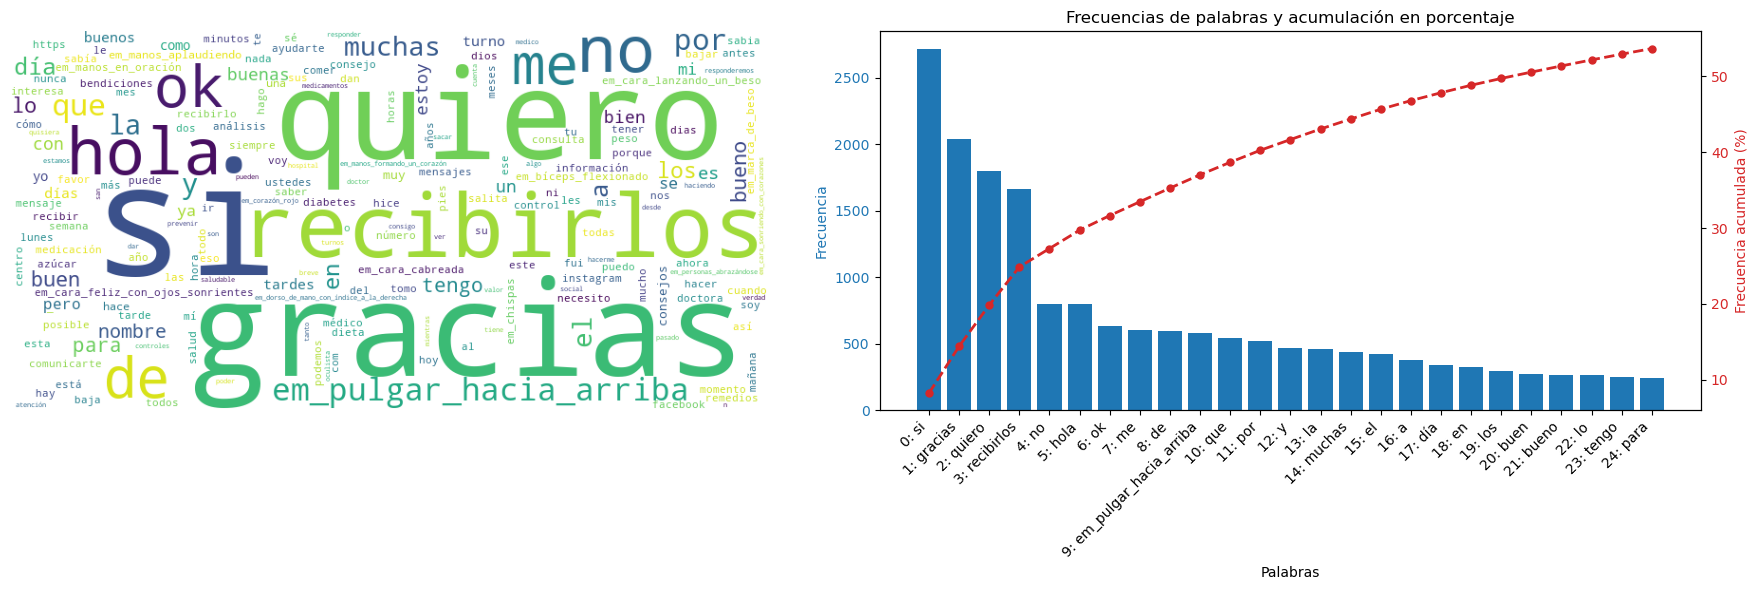

[('si', 2714),
 ('gracias', 2043),
 ('quiero', 1800),
 ('recibirlos', 1662),
 ('no', 803),
 ('hola', 802),
 ('ok', 636),
 ('me', 603),
 ('de', 596),
 ('em_pulgar_hacia_arriba', 581),
 ('que', 545),
 ('por', 525),
 ('y', 467),
 ('la', 461),
 ('muchas', 435),
 ('el', 427),
 ('a', 376),
 ('día', 344),
 ('en', 328),
 ('los', 296),
 ('buen', 277),
 ('bueno', 269),
 ('lo', 264),
 ('tengo', 251),
 ('para', 243),
 ('nombre', 221),
 ('es', 201),
 ('con', 183),
 ('estoy', 176),
 ('bien', 171),
 ('un', 166),
 ('buenas', 162),
 ('se', 147),
 ('mi', 142),
 ('ya', 141),
 ('pero', 132),
 ('tardes', 122),
 ('días', 120),
 ('turno', 120),
 ('buenos', 119),
 ('yo', 111),
 ('como', 111),
 ('consejos', 91),
 ('muy', 91),
 ('una', 84),
 ('em_manos_aplaudiendo', 83),
 ('hace', 83),
 ('información', 76),
 ('diabetes', 75),
 ('mensaje', 75),
 ('puedo', 74),
 ('este', 73),
 ('hago', 72),
 ('consejo', 70),
 ('número', 70),
 ('hacer', 69),
 ('al', 69),
 ('análisis', 68),
 ('em_chispas', 68),
 ('sabía', 67),
 ('m

In [26]:
# no convence hacer las correcciones automáticas por lo que se genera diccionario propio
# el diccionario en español de spellchecker no contiene conjugaciones y algunos modismos locales
correcciones = {}
correcciones['acen|hasen'] = 'hacen'
correcciones['acer'] = 'hacer'
correcciones['actibidad'] = 'actividad'
correcciones['adios'] = 'adiós'
correcciones['aga'] = 'haga'
correcciones['ago'] = 'hago'
correcciones['ahy|ai'] = 'ahí'
correcciones['alcansa'] = 'alcanza'
correcciones['alluda'] = 'ayuda'
correcciones['analices|analicis|analisi|analis|analisis']= 'análisis'
correcciones['aseme|haacerme'] = 'hacerme'
correcciones['asen'] = 'hacen'
correcciones['aser'] = 'hacer'
correcciones['aserme'] = 'hacerme'
correcciones['asiendo'] = 'haciendo'
correcciones['aveces'] = 'a veces'
correcciones['aver'] = 'a ver'
correcciones['ay'] = 'hay'
correcciones['azucar'] = 'azúcar'
correcciones['bici'] = 'bicicleta'
correcciones['bns'] = 'buenos'
correcciones['bs'] = 'beso'
correcciones['buendia|buendía'] = 'buen día'
correcciones['celu'] = 'celular'
correcciones['concejo'] = 'consejo'
correcciones['concejos'] = 'consejos'
correcciones['conosco']='conozco'
correcciones['consejonsaludable'] = 'consejo saludable'
correcciones['d']='de'
correcciones['diabetica']='diabética'
correcciones['diabetico']='diabético'
correcciones['diabétis|diabetis']='diabetes'
correcciones['diavetologa']='diabetóloga'
correcciones['dia|diaa']='día'
correcciones['dl']='del'
correcciones['doc|dr']='doctor'
correcciones['dra']='doctora'
correcciones['estoymedicada']='estoy medicada'
correcciones['esty']='estoy'
correcciones['fabor'] = 'favor'
correcciones['fslta']='falta'
correcciones['gimnacio'] = 'gimnasio'
correcciones['gs|gra a|gacias|grac|grasias|gracia|grasia|grscias|grácias|graciss|gracoas|graccias|graciass|grasiss|grasiaz|gracis|graciaa|graciias']='gracias'
correcciones['guiero|quuero|kiero|quero|qero'] = 'quiero'
correcciones['hare'] = 'haré'
correcciones['hhola|hla|jola|holaa|holaaa|holaaaa'] = 'hola'
correcciones['hicieron'] = 'hicieron'
correcciones['hra'] = 'hora'
correcciones['hs'] = 'horas'
correcciones['ise|hise|ice'] = 'hice'
correcciones['isieron'] = 'hicieron'
correcciones['iso'] = 'hizo'
correcciones['jirnacia'] = 'gimnasia'
correcciones['juves'] = 'jueves'
correcciones['mas'] = 'más'
correcciones['medicacion'] = 'medicación'
correcciones['msj'] = 'mensaje'
correcciones['msjs'] = 'mensajes'
correcciones['nesecito'] = 'necesito'
correcciones['no'] = 'no'
correcciones['nolose'] = 'no lo sé'
correcciones['numero|nro'] = 'número'
correcciones['nunka'] = 'nunca'
correcciones['octubrw']='octubre'
correcciones['oka|oki|okk|okey|oky|hokey'] = 'ok'
correcciones['porfavor'] = 'por favor'
correcciones['profecional'] = 'profesional'
correcciones['q|k|ke|qe|qque'] = 'que'
correcciones['resibirlo'] = 'recibirlo'
correcciones['rresibirlos|resibirlos'] = 'recibirlos'
correcciones['sii|si|sisi'] = 'si'
correcciones['sinta'] = 'cinta'
correcciones['sintas|sientas'] = 'cintas'
correcciones['siquiero'] = 'si quiero'
correcciones['siquierorecibirlos'] = 'si quiero recibirlos'
correcciones['sr'] = 'señor'
correcciones['sí|sii'] = 'si'
correcciones['tedan'] = 'te dan'
correcciones['tmb'] = 'también'
correcciones['ud'] = 'usted'
correcciones['uds|ustds'] = 'ustedes'
correcciones['vien'] = 'bien'
correcciones['voi|viy']='voy'
correcciones['wa'] = 'whatsapp'
correcciones['xfavor|porf'] = 'por favor'
correcciones['xla'] = 'por la'
correcciones['xq|xk|porq|pork|pq'] = 'porque'
correcciones['xsus'] = 'por sus'
correcciones['x|xr'] = 'por'
correcciones['yme'] = 'y me'

df['corregido'] = df['recibido_limpio'].apply(aplicar_correcciones, correcciones = correcciones, prefijo = "\\b(", sufijo = ")\\b")

mostrar_conteo(df,'corregido')

In [27]:
# TODO evaluar sacar tildes

In [28]:
# TODO comparar diferencias entre original y corregido (sin emoticones)

In [29]:
import nltk
from nltk.tokenize import word_tokenize

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aciga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aciga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# STOPWORDS

In [31]:
stop_words = sorted(nltk.corpus.stopwords.words('spanish'))

frecuencias = contar_frecuencia_palabras(df,'corregido')
frecuencias_dict = {wf[0]:wf[1] for wf in frecuencias}

print("Frecuencias de palabras en stop_words")
for palabra in stop_words:
    if palabra in frecuencias_dict.keys():
        print(palabra + ": " + str(frecuencias_dict[palabra]))
    else:
        print(palabra + ": 0")


Frecuencias de palabras en stop_words
a: 376
al: 69
algo: 18
algunas: 1
algunos: 3
ante: 0
antes: 42
como: 111
con: 183
contra: 1
cual: 13
cuando: 32
de: 596
del: 47
desde: 20
donde: 14
durante: 0
e: 13
el: 427
ella: 7
ellas: 0
ellos: 1
en: 328
entre: 1
era: 5
erais: 0
eran: 2
eras: 0
eres: 0
es: 201
esa: 13
esas: 0
ese: 28
eso: 35
esos: 5
esta: 35
estaba: 10
estabais: 0
estaban: 1
estabas: 0
estad: 0
estada: 0
estadas: 0
estado: 1
estados: 1
estamos: 23
estando: 0
estar: 10
estaremos: 0
estará: 0
estarán: 0
estarás: 0
estaré: 6
estaréis: 0
estaría: 2
estaríais: 0
estaríamos: 0
estarían: 0
estarías: 0
estas: 3
este: 73
estemos: 0
esto: 14
estos: 16
estoy: 176
estuve: 7
estuviera: 0
estuvierais: 0
estuvieran: 0
estuvieras: 0
estuvieron: 0
estuviese: 0
estuvieseis: 0
estuviesen: 0
estuvieses: 0
estuvimos: 1
estuviste: 0
estuvisteis: 0
estuviéramos: 0
estuviésemos: 0
estuvo: 0
está: 40
estábamos: 0
estáis: 0
están: 16
estás: 8
esté: 0
estéis: 0
estén: 0
estés: 1
fue: 15
fuera: 1
fuerais: 

In [32]:
# las palabras "sí" y "no" son muy importants porque determinan el sentido de muchas respuestas por lo que no se las puede inclui ren stopwords
# La palabra "ya" puede denotar algo que ya se hizo, por ejemplo un análisis
# Otras palabras a quitar de stop words por conocer el contexto: "sin", "muy", "cuando", "donde", "hay", "qué", "nada", "muchos", "soy", "fui", "tengo", "tuve"

palabras_excluir = ['si','sí','no','ya','sin', 'muy', 'cuando', 'donde', 'hay', 'qué', 'nada', 'muchos', 'soy', 'fui', 'tengo', 'tuve','ni']
for palabra in palabras_excluir:
    if palabra in stop_words:
        stop_words.remove(palabra)
        print(f'{palabra} removida')

def quitar_stop_words(line, stop_words):
    palabras = re.findall(r'\b\w+\b', line.lower())
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return ' '.join(palabras)


sí removida
no removida
ya removida
sin removida
muy removida
cuando removida
donde removida
hay removida
qué removida
nada removida
muchos removida
soy removida
fui removida
tengo removida
tuve removida
ni removida


In [33]:
df['sin_stop_words'] = df['corregido'].apply(quitar_stop_words, stop_words = stop_words)
df[['corregido','sin_stop_words']]

corregido  \
0      em_pulgar_hacia_arriba em_manos_formando_un_c...   
1                                                 hola    
2      em_manos_aplaudiendo em_manos_aplaudiendo gra...   
3                                               gracias   
4           hola si suele cuando me desvelo o de tarde    
...                                                 ...   
7045                            em_pulgar_hacia_arriba    
7046                               si quiero recibirlos   
7047                                            gracias   
7048                                      bueno gracias   
7049                  si ya fui a hacerme los controles   

                                         sin_stop_words  
0     em_pulgar_hacia_arriba em_manos_formando_un_co...  
1                                                  hola  
2     em_manos_aplaudiendo em_manos_aplaudiendo gracias  
3                                               gracias  
4                    hola si suele cuando desvelo tarde  
...                                                 ...  
7045                             em_pulgar_hacia_arriba  
7046                               si quiero recibirlos  
7047                                            gracias  
7048                                      bueno gracias  
7049                        si ya fui hacerme controles  

[7050 rows x 2 columns]

Frecuencias primeros 20: [('si', 2714), ('gracias', 2043), ('quiero', 1800), ('recibirlos', 1662), ('no', 803), ('hola', 802), ('ok', 639), ('aprobación', 590), ('muchas', 435), ('día', 344), ('buen', 277), ('bueno', 269), ('tengo', 251), ('nombre', 221), ('bien', 171), ('buenas', 162), ('ya', 141), ('felicidad', 123), ('tardes', 122), ('días', 120)]
Frecuencias últimos 20: [('laborales', 1), ('etc', 1), ('parece', 1), ('nda', 1), ('animarme', 1), ('mendoza', 1), ('esq', 1), ('ehh', 1), ('vuelto', 1), ('alla', 1), ('tomsndo', 1), ('suspendieron', 1), ('hacerle', 1), ('practica', 1), ('indica', 1), ('marchetti', 1), ('autódromo', 1), ('constitución', 1), ('felicidades', 1), ('mentable', 1)]
Cantidad de palabras: 2780
Cantidad de palabras frecuencia <=3: 2199
Cantidad de palabras frecuencia =1: 1610


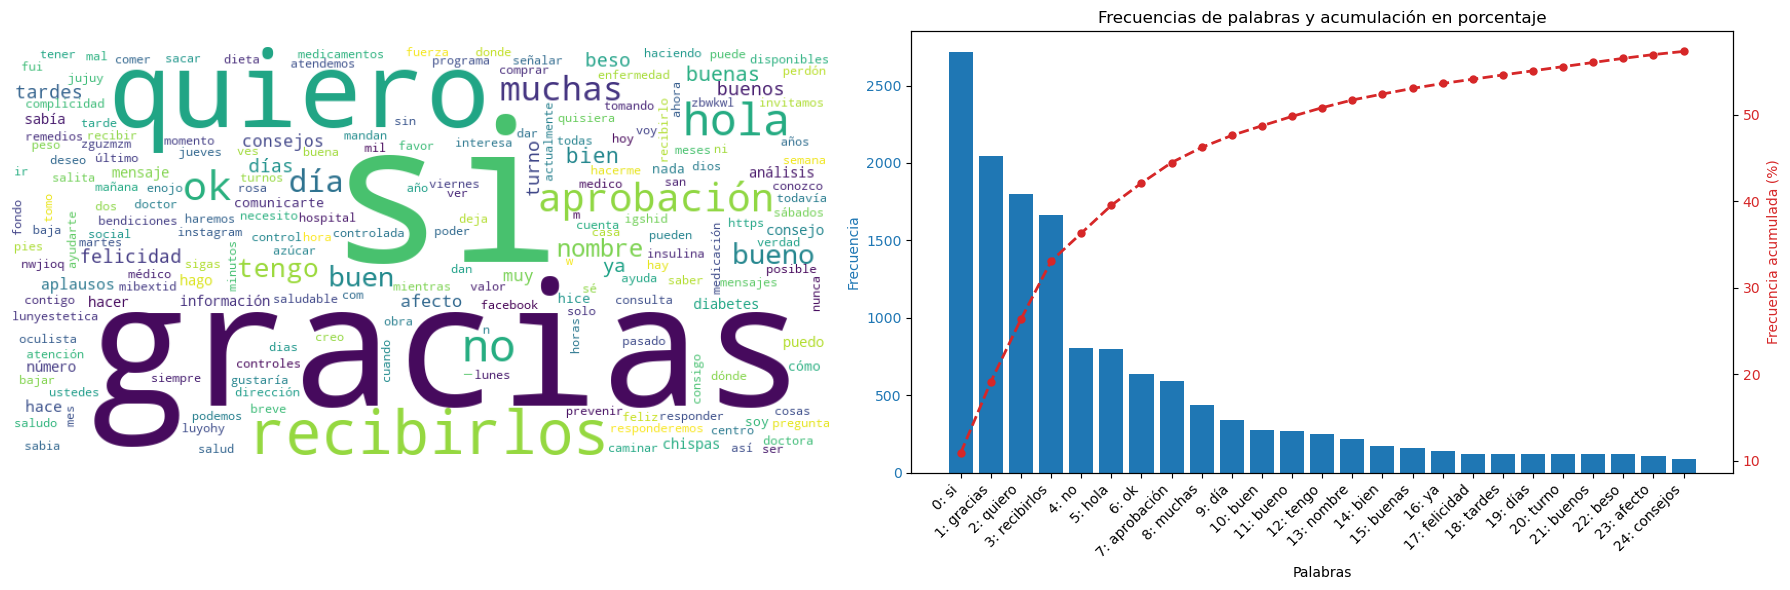

[('si', 2714),
 ('gracias', 2043),
 ('quiero', 1800),
 ('recibirlos', 1662),
 ('no', 803),
 ('hola', 802),
 ('ok', 639),
 ('aprobación', 590),
 ('muchas', 435),
 ('día', 344),
 ('buen', 277),
 ('bueno', 269),
 ('tengo', 251),
 ('nombre', 221),
 ('bien', 171),
 ('buenas', 162),
 ('ya', 141),
 ('felicidad', 123),
 ('tardes', 122),
 ('días', 120),
 ('turno', 120),
 ('buenos', 119),
 ('beso', 119),
 ('afecto', 108),
 ('consejos', 91),
 ('muy', 91),
 ('aplausos', 83),
 ('hace', 83),
 ('información', 76),
 ('diabetes', 75),
 ('mensaje', 75),
 ('puedo', 74),
 ('hago', 72),
 ('consejo', 70),
 ('número', 70),
 ('hacer', 69),
 ('análisis', 68),
 ('chispas', 68),
 ('sabía', 67),
 ('cómo', 59),
 ('soy', 58),
 ('comunicarte', 58),
 ('_', 57),
 ('nada', 54),
 ('hice', 52),
 ('control', 48),
 ('voy', 48),
 ('podemos', 47),
 ('sabia', 47),
 ('año', 46),
 ('salud', 45),
 ('3', 44),
 ('meses', 44),
 ('horas', 44),
 ('enojo', 43),
 ('ayudarte', 40),
 ('https', 39),
 ('necesito', 38),
 ('bendiciones', 37)

In [34]:
# aplicar significado de emoticones
df['sin_stop_words_significado_emoticones'] = df['sin_stop_words'].apply(aplicar_significado_emoticones, significados_emoticones = significados_emoticones)
df[['corregido','sin_stop_words_significado_emoticones']]

mostrar_conteo(df,'sin_stop_words_significado_emoticones')

In [35]:
!pip install spacy
!python -m spacy download es_core_news_sm

# lematizar
import spacy
nlp = spacy.load("es_core_news_sm")


     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.9 MB 3.2 MB/s eta 0:00:05
      --------------------------------------- 0.2/12.9 MB 3.3 MB/s eta 0:00:04
     - -------------------------------------- 0.3/12.9 MB 3.4 MB/s eta 0:00:04
     - -------------------------------------- 0.5/12.9 MB 3.1 MB/s eta 0:00:04
     - -------------------------------------- 0.5/12.9 MB 3.0 MB/s eta 0:00:05
     - -------------------------------------- 0.6/12.9 MB 2.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/12.9 MB 2.8 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.9 MB 2.7 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.9 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.9 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.9 MB 2.8 MB/s eta 0:00:05
     ---- ----------------------------------- 1.3/12.9 MB 2

Frecuencias primeros 20: [('si', 2714), ('querer', 1839), ('él', 1761), ('recibir', 1729), ('gracias', 1427), ('no', 807), ('holar', 723), ('ok', 639), ('aprobación', 590), ('gracia', 588), ('mucho', 538), ('día', 464), ('buen', 411), ('hacer', 346), ('tener', 285), ('bueno', 269), ('poder', 231), ('nombre', 220), ('bien', 171), ('buena', 162)]
Frecuencias últimos 20: [('denucia', 1), ('compra', 1), ('possecion', 1), ('localizar', 1), ('titular', 1), ('etc', 1), ('parecer', 1), ('nda', 1), ('animarme', 1), ('mendozar', 1), ('vuelvo', 1), ('esq', 1), ('ehh', 1), ('allo', 1), ('tomsndo', 1), ('practicar', 1), ('marchetti', 1), ('autódromo', 1), ('constitución', 1), ('mentable', 1)]
Cantidad de palabras: 2425
Cantidad de palabras frecuencia <=3: 1905
Cantidad de palabras frecuencia =1: 1410


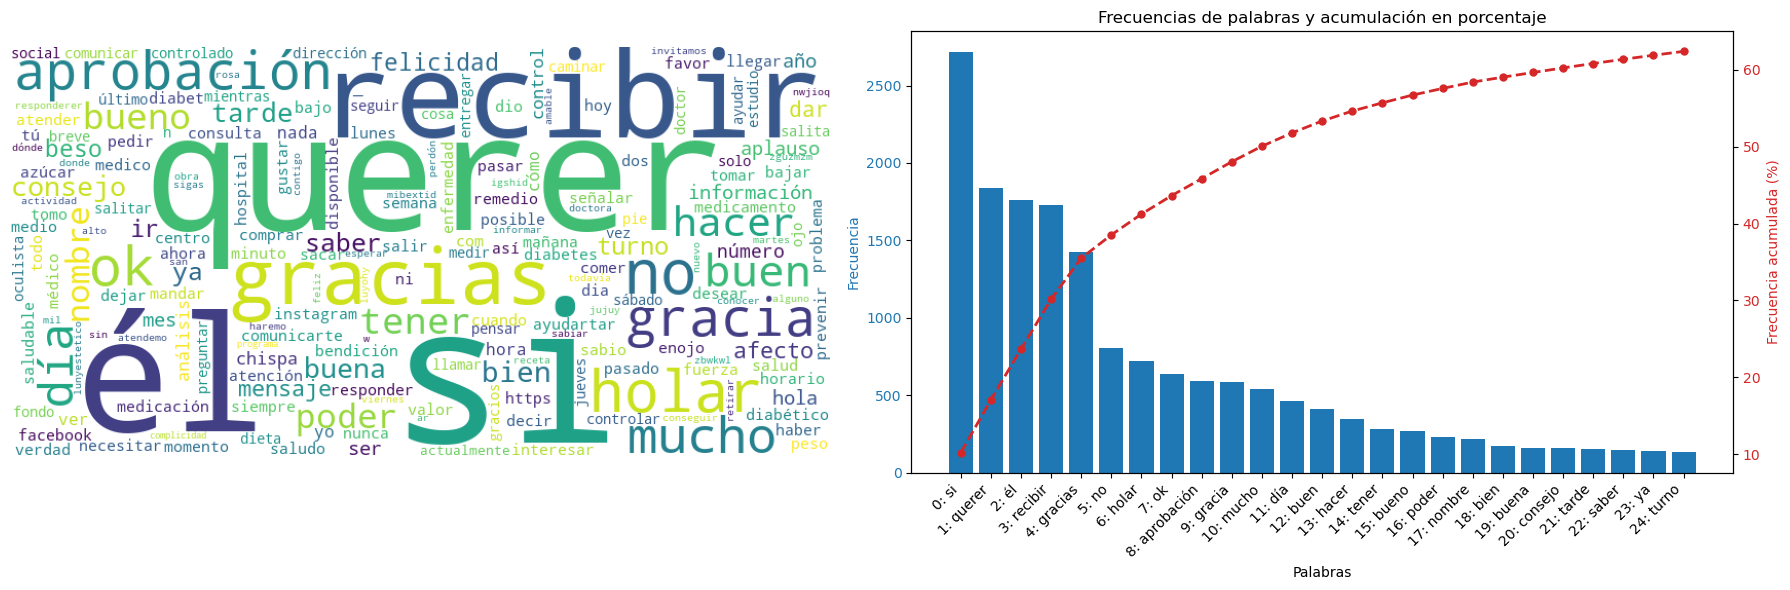

[('si', 2714),
 ('querer', 1839),
 ('él', 1761),
 ('recibir', 1729),
 ('gracias', 1427),
 ('no', 807),
 ('holar', 723),
 ('ok', 639),
 ('aprobación', 590),
 ('gracia', 588),
 ('mucho', 538),
 ('día', 464),
 ('buen', 411),
 ('hacer', 346),
 ('tener', 285),
 ('bueno', 269),
 ('poder', 231),
 ('nombre', 220),
 ('bien', 171),
 ('buena', 162),
 ('consejo', 159),
 ('tarde', 153),
 ('saber', 146),
 ('ya', 141),
 ('turno', 133),
 ('ir', 130),
 ('felicidad', 124),
 ('beso', 119),
 ('afecto', 108),
 ('mensaje', 104),
 ('dar', 99),
 ('aplauso', 83),
 ('hola', 79),
 ('mes', 79),
 ('información', 76),
 ('ser', 76),
 ('año', 75),
 ('número', 71),
 ('análisis', 67),
 ('control', 67),
 ('chispa', 67),
 ('yo', 63),
 ('_', 62),
 ('hora', 61),
 ('cómo', 59),
 ('ver', 56),
 ('nada', 54),
 ('diabet', 50),
 ('comunicarte', 47),
 ('tú', 47),
 ('salud', 45),
 ('3', 44),
 ('enojo', 43),
 ('médico', 41),
 ('necesitar', 40),
 ('https', 39),
 ('bajar', 38),
 ('tomar', 38),
 ('bendición', 38),
 ('haber', 37),
 ('m

In [36]:
def lematizar(line):
    doc = nlp(line)
    return ' '.join([token.lemma_ for token in doc])

# lematizar en columnas sin stop words con y sin significado de emoticones
df['sin_stop_words_lematizada'] = df['sin_stop_words'].apply(lematizar)
df['sin_stop_words_significado_emoticones_lematizada'] = df['sin_stop_words_significado_emoticones'].apply(lematizar)

mostrar_conteo(df,'sin_stop_words_significado_emoticones_lematizada')

In [37]:
df[['corregido','sin_stop_words','sin_stop_words_lematizada','sin_stop_words_significado_emoticones','sin_stop_words_significado_emoticones_lematizada']]

corregido  \
0      em_pulgar_hacia_arriba em_manos_formando_un_c...   
1                                                 hola    
2      em_manos_aplaudiendo em_manos_aplaudiendo gra...   
3                                               gracias   
4           hola si suele cuando me desvelo o de tarde    
...                                                 ...   
7045                            em_pulgar_hacia_arriba    
7046                               si quiero recibirlos   
7047                                            gracias   
7048                                      bueno gracias   
7049                  si ya fui a hacerme los controles   

                                         sin_stop_words  \
0     em_pulgar_hacia_arriba em_manos_formando_un_co...   
1                                                  hola   
2     em_manos_aplaudiendo em_manos_aplaudiendo gracias   
3                                               gracias   
4                    hola si suele cuando desvelo tarde   
...                                                 ...   
7045                             em_pulgar_hacia_arriba   
7046                               si quiero recibirlos   
7047                                            gracias   
7048                                      bueno gracias   
7049                        si ya fui hacerme controles   

                              sin_stop_words_lematizada  \
0     em_pulgar_hacia_arrir em_manos_formando_un_cor...   
1                                                 holar   
2          em_manos_aplaudeir em_manos_aplaudeir gracia   
3                                               gracias   
4                  holar si soler cuando desve él tarde   
...                                                 ...   
7045                              em_pulgar_hacia_arrir   
7046                               si querer recibir él   
7047                                            gracias   
7048                                      bueno gracias   
7049                           si ya ir hacerme control   

     sin_stop_words_significado_emoticones  \
0                        aprobación afecto   
1                                     hola   
2                aplausos aplausos gracias   
3                                  gracias   
4       hola si suele cuando desvelo tarde   
...                                    ...   
7045                            aprobación   
7046                  si quiero recibirlos   
7047                               gracias   
7048                         bueno gracias   
7049           si ya fui hacerme controles   

     sin_stop_words_significado_emoticones_lematizada  
0                                   aprobación afecto  
1                                               holar  
2                             aplauso aplauso gracias  
3                                             gracias  
4                holar si soler cuando desve él tarde  
...                                               ...  
7045                                       aprobación  
7046                             si querer recibir él  
7047                                          gracias  
7048                                    bueno gracias  
7049                         si ya ir hacerme control  

[7050 rows x 5 columns]

In [38]:
# STEMMER
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
stemmer = SnowballStemmer('spanish')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aciga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Frecuencias primeros 20: [('si', 2714), ('graci', 2044), ('quier', 1809), ('recib', 1737), ('buen', 842), ('hol', 803), ('no', 803), ('ok', 639), ('aprob', 592), ('much', 447), ('dia', 344), ('teng', 253), ('nombr', 221), ('hac', 209), ('bien', 172), ('consej', 161), ('dias', 156), ('tard', 153), ('ya', 141), ('turn', 140)]
Frecuencias últimos 20: [('km', 1), ('municipal', 1), ('motor', 1), ('prend', 1), ('cancel', 1), ('domini', 1), ('mult', 1), ('denuci', 1), ('possecion', 1), ('localiz', 1), ('etc', 1), ('nda', 1), ('anim', 1), ('mendoz', 1), ('esq', 1), ('ehh', 1), ('tomsnd', 1), ('marchetti', 1), ('constitu', 1), ('mentabl', 1)]
Cantidad de palabras: 1956
Cantidad de palabras frecuencia <=3: 1436
Cantidad de palabras frecuencia =1: 1006


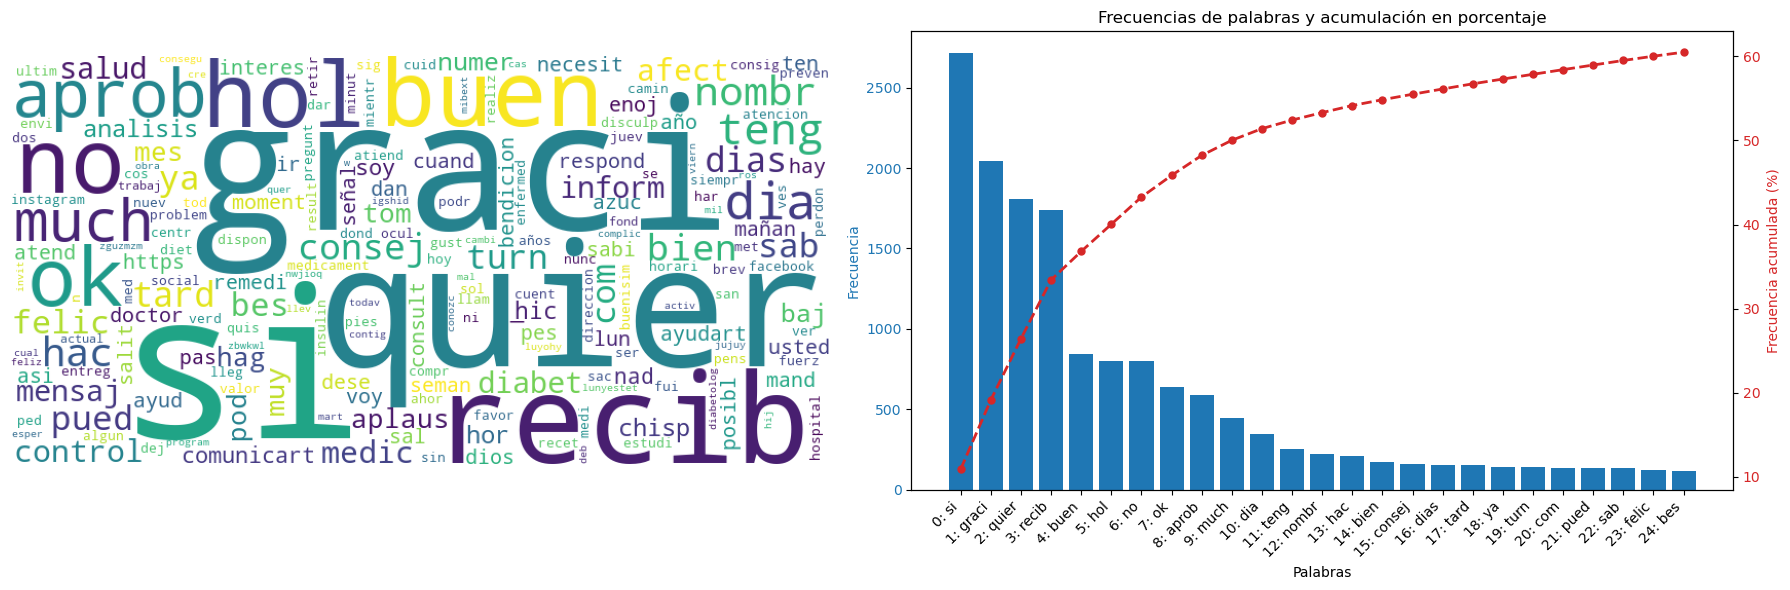

[('si', 2714),
 ('graci', 2044),
 ('quier', 1809),
 ('recib', 1737),
 ('buen', 842),
 ('hol', 803),
 ('no', 803),
 ('ok', 639),
 ('aprob', 592),
 ('much', 447),
 ('dia', 344),
 ('teng', 253),
 ('nombr', 221),
 ('hac', 209),
 ('bien', 172),
 ('consej', 161),
 ('dias', 156),
 ('tard', 153),
 ('ya', 141),
 ('turn', 140),
 ('com', 138),
 ('pued', 136),
 ('sab', 135),
 ('felic', 126),
 ('bes', 119),
 ('control', 115),
 ('medic', 112),
 ('afect', 110),
 ('inform', 106),
 ('diabet', 104),
 ('mensaj', 104),
 ('salud', 102),
 ('muy', 91),
 ('aplaus', 83),
 ('mes', 81),
 ('pod', 78),
 ('hag', 77),
 ('tom', 75),
 ('baj', 71),
 ('numer', 71),
 ('analisis', 68),
 ('chisp', 68),
 ('hor', 68),
 ('hic', 61),
 ('soy', 58),
 ('comunicart', 58),
 ('_', 57),
 ('nad', 54),
 ('pas', 48),
 ('voy', 48),
 ('sabi', 48),
 ('respond', 48),
 ('mand', 47),
 ('año', 46),
 ('usted', 45),
 ('necesit', 44),
 ('3', 44),
 ('enoj', 43),
 ('doctor', 41),
 ('ayudart', 40),
 ('https', 39),
 ('seman', 38),
 ('bendicion', 38),

In [39]:
def stematizar(line):
    tokens = word_tokenize(line)
    return ' '.join([stemmer.stem(token) for token in tokens])

# lematizar en columnas sin stop words con y sin significado de emoticones
df['sin_stop_words_stemmed'] = df['sin_stop_words'].apply(stematizar)
df['sin_stop_words_significado_emoticones_stemmed'] = df['sin_stop_words_significado_emoticones'].apply(stematizar)

mostrar_conteo(df,'sin_stop_words_significado_emoticones_stemmed')

In [40]:
df[['corregido','sin_stop_words','sin_stop_words_stemmed','sin_stop_words_significado_emoticones','sin_stop_words_significado_emoticones_stemmed']]

corregido  \
0      em_pulgar_hacia_arriba em_manos_formando_un_c...   
1                                                 hola    
2      em_manos_aplaudiendo em_manos_aplaudiendo gra...   
3                                               gracias   
4           hola si suele cuando me desvelo o de tarde    
...                                                 ...   
7045                            em_pulgar_hacia_arriba    
7046                               si quiero recibirlos   
7047                                            gracias   
7048                                      bueno gracias   
7049                  si ya fui a hacerme los controles   

                                         sin_stop_words  \
0     em_pulgar_hacia_arriba em_manos_formando_un_co...   
1                                                  hola   
2     em_manos_aplaudiendo em_manos_aplaudiendo gracias   
3                                               gracias   
4                    hola si suele cuando desvelo tarde   
...                                                 ...   
7045                             em_pulgar_hacia_arriba   
7046                               si quiero recibirlos   
7047                                            gracias   
7048                                      bueno gracias   
7049                        si ya fui hacerme controles   

                                 sin_stop_words_stemmed  \
0     em_pulgar_hacia_arrib em_manos_formando_un_cor...   
1                                                   hol   
2                 em_manos_aplaud em_manos_aplaud graci   
3                                                 graci   
4                         hol si suel cuand desvel tard   
...                                                 ...   
7045                              em_pulgar_hacia_arrib   
7046                                     si quier recib   
7047                                              graci   
7048                                         buen graci   
7049                              si ya fui hac control   

     sin_stop_words_significado_emoticones  \
0                        aprobación afecto   
1                                     hola   
2                aplausos aplausos gracias   
3                                  gracias   
4       hola si suele cuando desvelo tarde   
...                                    ...   
7045                            aprobación   
7046                  si quiero recibirlos   
7047                               gracias   
7048                         bueno gracias   
7049           si ya fui hacerme controles   

     sin_stop_words_significado_emoticones_stemmed  
0                                      aprob afect  
1                                              hol  
2                              aplaus aplaus graci  
3                                            graci  
4                    hol si suel cuand desvel tard  
...                                            ...  
7045                                         aprob  
7046                                si quier recib  
7047                                         graci  
7048                                    buen graci  
7049                         si ya fui hac control  

[7050 rows x 5 columns]

In [41]:
# guarda csv
df.to_csv("mensajes_preprocesados.csv")

In [42]:
# funcion para obtener distintas versiones a partir de un mensaje individual
def preprocesar(mensaje, agrupamiento_emojis=agrupamiento_emojis, correcciones = correcciones, stop_words = stop_words,significados_emoticones = significados_emoticones):
    recibido_con_emoticones = aplicar_correcciones(emoji_em(convertir_emoticones(mensaje)),correcciones = agrupamiento_emojis)
    recibido_limpio = espacios_dobles(letras_repetidas(minuscula(blank_line(puntuacion(separa_letra_numero(recibido_con_emoticones))))))
    corregido = aplicar_correcciones(recibido_limpio, correcciones = correcciones, prefijo = "\\b(", sufijo = ")\\b")
    sin_stop_words = quitar_stop_words(corregido, stop_words = stop_words)
    sin_stop_words_significado_emoticones = aplicar_significado_emoticones(sin_stop_words, significados_emoticones = significados_emoticones)
    sin_stop_words_lematizada = lematizar(sin_stop_words)
    sin_stop_words_significado_emoticones_lematizada = lematizar(sin_stop_words_significado_emoticones)
    sin_stop_words_stemmed = stematizar(sin_stop_words)
    sin_stop_words_significado_emoticones_stemmed = stematizar(sin_stop_words_significado_emoticones)

    return {
            "recibido_con_emoticones": recibido_con_emoticones,
            "recibido_limpio": recibido_limpio,
            "corregido": corregido,
            "sin_stop_words": sin_stop_words,
            "sin_stop_words_significado_emoticones": sin_stop_words_significado_emoticones,
            "sin_stop_words_lematizada": sin_stop_words_lematizada,
            "sin_stop_words_significado_emoticones_lematizada": sin_stop_words_significado_emoticones_lematizada,
            "sin_stop_words_stemmed": sin_stop_words_stemmed,
            "sin_stop_words_significado_emoticones_stemmed": sin_stop_words_significado_emoticones_stemmed
           }


In [43]:
preprocesar("👏👏👏👏👏👏💪💪💪")

{'recibido_con_emoticones': ' em_manos_aplaudiendo  em_manos_aplaudiendo  em_manos_aplaudiendo  em_manos_aplaudiendo  em_manos_aplaudiendo  em_manos_aplaudiendo  em_bíceps_flexionado  em_bíceps_flexionado  em_bíceps_flexionado ',
 'recibido_limpio': ' em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_bíceps_flexionado em_bíceps_flexionado em_bíceps_flexionado ',
 'corregido': ' em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_bíceps_flexionado em_bíceps_flexionado em_bíceps_flexionado ',
 'sin_stop_words': 'em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_manos_aplaudiendo em_bíceps_flexionado em_bíceps_flexionado em_bíceps_flexionado',
 'sin_stop_words_significado_emoticones': 'aplausos aplausos aplausos aplausos aplausos aplausos fuerza fuerza fuerza',
 'sin_stop_words_